Model:
1. Support Vector Machine
2. K-means
3. Logistic Regression
4. Multiple linear regression

1. Support Vector Machine

In [121]:
# to load all the libraries
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [122]:
recipes=pd.read_csv('./Cupcakes vs Muffins.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


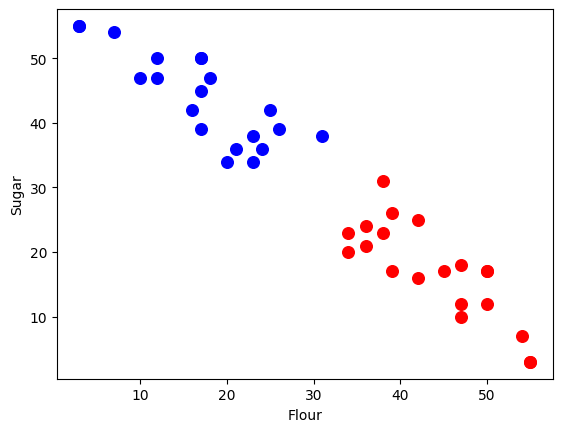

In [123]:
# Create a scatter plot
plt.scatter(recipes['Flour'], recipes['Sugar'], label='Type 1', color='red', s=70)
plt.scatter(recipes['Sugar'], recipes['Flour'], label='Type 2', color='blue', s=70)

# Set the labels and title
plt.xlabel('Flour')
plt.ylabel('Sugar')

# Display the plot
plt.show()

In [124]:
recipes_features = recipes['Type']
ingredients = recipes[['Flour', 'Sugar']]
ingredients_train, ingredients_test, recipes_features_train, recipes_features_test = train_test_split(ingredients, recipes_features, test_size=0.2)

In [131]:
#fit the model
model= svm.SVC(kernel='linear', C=10000)
for i in range(0, 20):
    model.fit(ingredients_train, recipes_features_train)

In [135]:
#get the spdarting hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx -(model.intercept_[0] / w[1])

#plot the parllels to the separating hyperplane that pass through the support vector
b = model.support_vectors_[0]
yy_down = a * xx + (b[1]- a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx +(b[1] - a * b[0])

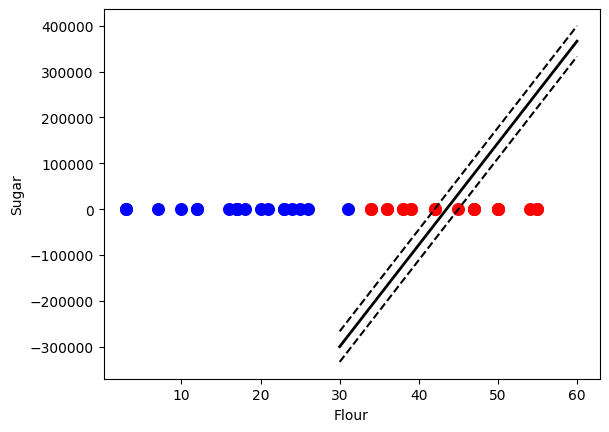

In [136]:
# Create a scatter plot
plt.scatter(recipes['Flour'], recipes['Sugar'], label='Type 1', color='red', s=70)
plt.scatter(recipes['Sugar'], recipes['Flour'], label='Type 2', color='blue', s=70)

# plot the support vector and the hyperplane
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up, 'k--')

# # Plot the support vectors
# plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# # Plot the hyperplane
# # xx = np.linspace(min(ingredients['Flour']), max(ingredients['Flour']), 100)
# # yy = (-w[0] * xx - b) / w[1]
# plt.plot(xx, yy, '-k', label='Hyperplane')

# Set the labels and title
plt.xlabel('Flour')
plt.ylabel('Sugar')
# Display the plot
plt.show()
    

In [128]:
accuresy = model.score(ingredients_test, recipes_features_test)
print(accuresy)

1.0


2. K-means

In [85]:
# to load all the libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [86]:
data=pd.read_csv('./Cupcakes vs Muffins.csv')
# print(data.head())
x=data[data.columns[1:4]]
x.head()


,Flour,Milk,Sugar
0,55,28,3
1,47,24,12
2,47,23,18
3,45,11,17
4,50,25,12


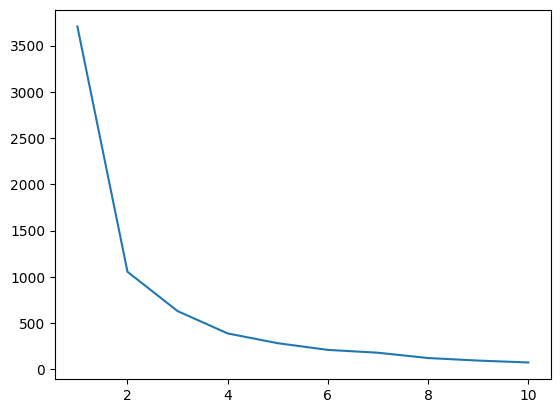

In [87]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=10, n_init=3, random_state=45)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [88]:
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=10, n_init=3, random_state=45)
y_kmean = kmeans.fit_predict(np.asarray(x))
# x = np.matrix(x.to_numpy().reshape(1, -1))
# x=x.as_matrix(columns=None)
print(x)

    Flour  Milk  Sugar
0      55    28      3
1      47    24     12
2      47    23     18
3      45    11     17
4      50    25     12
5      55    27      3
6      45    11     17
7      50    25     12
8      55    27      3
9      54    27      7
10     54    27      7
11     47    26     10
12     50    17     17
13     50    17     17
14     39    15     26
15     39    21     16
16     34    17     20
17     39    13     17
18     38    15     23
19     38    18     25
20     36    14     21
21     34    17     20
22     39    13     17
23     38    15     23
24     38    18     25
25     36    14     21
26     38    15     23
27     36    16     24
28     34    17     23


[]

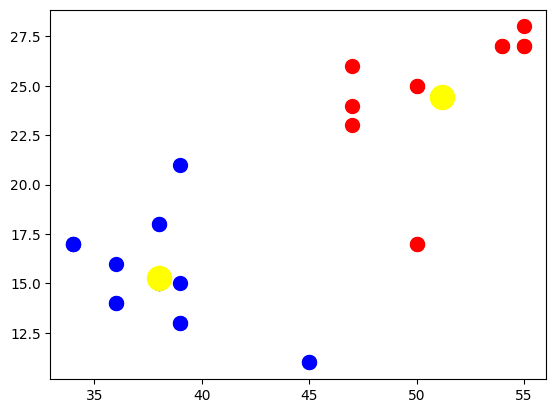

In [89]:
# plt.scatter(x[y_kmean == 0, 0], x[y_kmean == 0, 1],s=100,c='red', lable='CC')
plt.scatter(x.values[y_kmean == 0][:, 0], x.values[y_kmean == 0][:, 1],s=100,c='red')
plt.scatter(x.values[y_kmean == 1][:, 0], x.values[y_kmean == 1][:, 1],s=100,c='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow')
plt.plot()

3. Logistic Regression

In [90]:
# to load all the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [91]:
data=pd.read_csv('./data (1) (dataset for logistic).csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[]

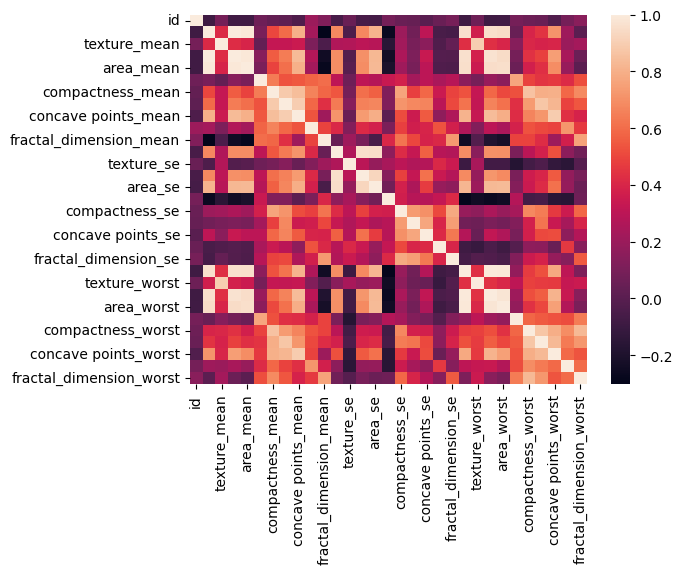

In [92]:
# plt.scatter('radius_mean', 'texture_mean', data=data)
data1=data[['radius_mean', 'texture_mean']]
# plt.hist(data1, bins=10)
data2=data[['id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
sns.heatmap(data2.corr())
plt.plot()

In [93]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [94]:
X = data[['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
y = data['diagnosis']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

u:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_predict=log_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.91      1.00      0.95        30
           M       1.00      0.90      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



4. Multiple linear regression

In [97]:
# to load all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [98]:
companies=pd.read_csv('./1000_Companies.csv')
X1 = companies.iloc[:, :-1].values
Y1 = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

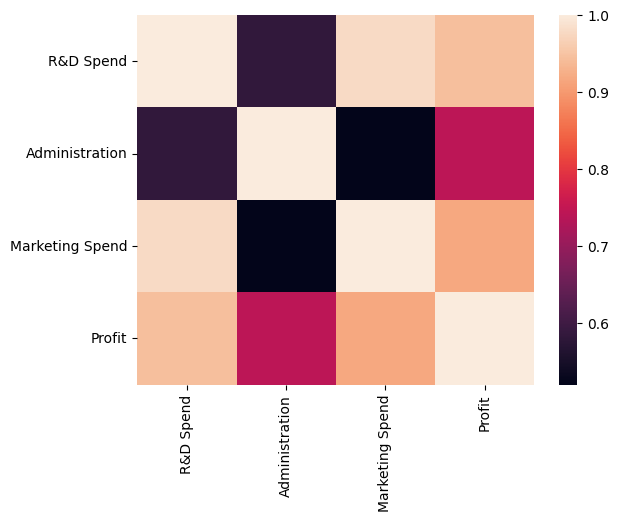

In [99]:
companies1=companies[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]
sns.heatmap(companies1.corr())

In [100]:
from sklearn.compose import ColumnTransformer
Labelencoder= LabelEncoder()
X1[:, 3] = Labelencoder.fit_transform(X1[:, 3])
categorical_columns=[3]
onehotencoder = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), categorical_columns)],remainder="passthrough")
X1 = onehotencoder.fit_transform(X1)
print(X1[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [101]:
#avoid the dummy variable trap
X1=X1[:, 1:]

x1_train1, x1_test1, y1_train1, y1_test1= train_test_split(X1, Y1, test_size=0.3)

In [102]:
mut_model=LinearRegression()
mut_model.fit(x1_train1,y1_train1)

LinearRegression()

In [103]:
y1_predict = mut_model.predict(x1_test1)
y1_predict

array([ 64728.53472478,  79961.43311759,  88009.37736935, 114065.58447259,
       184999.93464293,  92947.24794831, 169629.59914275, 157629.65591679,
       117883.62592279, 164170.34303701, 135974.9143874 , 111742.45052106,
       143112.64798477, 119781.69617096, 117185.13246201,  51492.823064  ,
        91137.94990839, 149916.03133823, 133795.01115696, 181607.5007334 ,
       109344.30759998, 185600.13456023, 151825.98419915, 182025.60547377,
       104587.89430689,  56110.01267673, 181728.11513037, 100036.56519217,
       165810.06650569, 162866.43064042,  56281.37412906, 182944.46760128,
        55352.12068913, 111910.33248859, 119092.47570353, 121029.93796761,
        88134.58946833, 117268.63850645, 127734.77922372,  58060.84873878,
       153364.13605971,  67581.70567621, 115490.40674505,  90264.86406269,
       168927.33092532,  53884.10107918, 135229.15335607,  64591.09761741,
       143988.84033733, 131648.77829593, 131121.99412301,  90975.58242999,
       104162.5352265 , 1

In [104]:
from sklearn.metrics import r2_score
r2_score(y1_test1, y1_predict)

0.9141599881310463